##  <font color='darkgreen'>Benchmarking Algorithm Optimisation Methods</font>
 
 Name: A.laldin
 
 Date: 21/12/2021
 
Project: R&D/ AD-Hoc

 Aims: Comparison of Algorithm Training Optimisation Methods
 
 Adapted From : https://hutsons-hacks.info/parallelisation-of-sci-kit-learning-python-models

##  <font color='darkgreen'>Module Loading </font>

In [1]:
from time import time
from sklearn.datasets import make_classification
import os
import platform
from timeit import default_timer as timer
import matplotlib.pyplot as plt

##  <font color='darkgreen'>Machine Information</font>

In [2]:
# Get CPU cores
cpu_count = os.cpu_count()
print(f"Your Computer Has {cpu_count} cores")
reserved_cpu = 1
final_cpu = int(cpu_count - reserved_cpu)
print(f"Saving one CPU so my PC does not lock up, using: {final_cpu}")



print("\nYour Computer's processor is",platform.processor())
print("\nYour Computer Chip is a",platform.machine())


Your Computer Has 8 cores
Saving one CPU so my PC does not lock up, using: 7

Your Computer's processor is Intel64 Family 6 Model 94 Stepping 3, GenuineIntel

Your Computer Chip is a AMD64


##  <font color='darkgreen'>Create the dataset</font>


In [3]:
X, Y = make_classification(n_samples=10000,
                           n_features=60, 
                           n_informative=55,
                           n_redundant=5)

##  <font color='darkgreen'>Model Training with Multiple Core Usage</font>

[MODEL INFO] The model ran in 28.22
[MODEL INFO] The model ran in 14.53
[MODEL INFO] The model ran in 10.73
[MODEL INFO] The model ran in 9.25
[MODEL INFO] The model ran in 7.79
[MODEL INFO] The model ran in 6.88
[MODEL INFO] The model ran in 6.59
[MODEL INFO] The model ran in 6.39


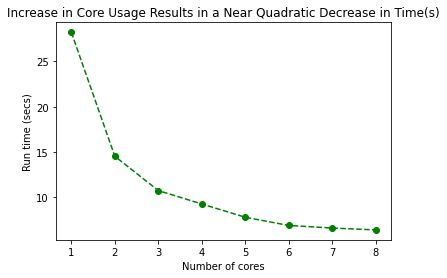

'Original Scikit-learn time: 90.73 s'

In [4]:
from sklearn.ensemble import RandomForestClassifier

start = timer()

results_list = list()
n_cores = [1,2,3,4,5,6,7,8]
# Function to run model and create a timer and list output of the model

def run_model(model, X, Y):
    start = time()
    model = model.fit(X,Y)
    end = time()
    result = end-start
    print("[MODEL INFO] The model ran in {:.2f}".format(result))
    return [model, result]

for model_it in n_cores:
    model = RandomForestClassifier(n_estimators=500, n_jobs=model_it)
    model_fit = run_model(model, X, Y)
    results = model_fit[1] #Slice the index of the model to get the fit
    results_list.append(results)
    
# Generate plot of results
def plot_results(x_val, y_val):
   plt.plot(x_val, y_val, color="green", linestyle="--", marker="o")
   plt.ylabel("Run time (secs)")
   plt.xlabel("Number of cores")
   plt.title("Increase in Core Usage Results in a Near Quadratic Decrease in Time(s)")
   plt.show() 
   
plot_results(n_cores, results_list)
model_time = timer() - start
f"Original Scikit-learn time: {model_time:.2f} s"

 ## <font color='darkgreen'> Model Training With Intel Extension</font>

[MODEL INFO] The model ran in 3.80
[MODEL INFO] The model ran in 2.70
[MODEL INFO] The model ran in 2.67
[MODEL INFO] The model ran in 2.61
[MODEL INFO] The model ran in 2.70
[MODEL INFO] The model ran in 2.63
[MODEL INFO] The model ran in 2.70
[MODEL INFO] The model ran in 2.66


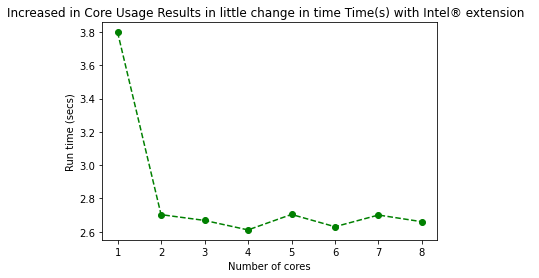

'Intel® extension for Scikit-learn time: 22.80 s'

In [5]:
#from sklearnex import patch_sklearn
#patch_sklearn()
from sklearnex.ensemble import RandomForestClassifier

start = timer()

results_list = list()

n_cores = [1,2,3,4,5,6,7,8]

# Function to run model and create a timer and list output of the model
def run_model(model, X, Y):
    start = time()
    model = model.fit(X,Y)
    end = time()
    result = end-start
    print("[MODEL INFO] The model ran in {:.2f}".format(result))
    return [model, result]

for model_it in n_cores:
    model = RandomForestClassifier(n_estimators=500, n_jobs=model_it)
    model_fit = run_model(model, X, Y)
    results = model_fit[1] #Slice the index of the model to get the fit
    results_list.append(results)
    
# Generate plot of results
def plot_results(x_val, y_val):
   plt.plot(x_val, y_val, color="green", linestyle="--", marker="o")
   plt.ylabel("Run time (secs)")
   plt.xlabel("Number of cores")
   plt.title("Increased in Core Usage Results in little change in time Time(s) with Intel® extension  ")
   plt.show() 
   
plot_results(n_cores, results_list)
model_time_intel = timer() - start
f"Intel® extension for Scikit-learn time: {model_time_intel:.2f} s"

##  <font color='darkgreen'> Conculsion </font>

*  Use Intel Extension for Scikit-learn